### Modelo de recomendacion y EDA

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import ast
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
#Importamos la data ya limpia tenieno asi dos daframes
data_movies = pd.read_pickle('peliculas.pkl')
data_credits = pd.read_pickle('credits.pkl')

In [5]:
data_movies.head()

,index,budget,id,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,...,vote_count,release_year,return,id_movies,name_company,id_company,Gender,id_gender,Countries,similarity
0,0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,5415.0,1995,12.451801,10194,[Pixar Animation Studios],[3],"[Animation, Comedy, Family]","[16, 35, 10751]",[United States of America],1.0
1,1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,2413.0,1995,4.043035,23405,"[TriStar Pictures, Teitler Film, Interscope Co...","[559, 2550, 10201]","[Adventure, Fantasy, Family]","[12, 14, 10751]",[United States of America],1.0
2,4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,173.0,1995,0.000000,96871,"[Paramount Pictures, Scott Rudin Productions, ...","[4, 258, 932, 5842, 14941, 55873, 58079]","[Comedy, Romance]","[35, 10749]","[Germany, United States of America]",1.0
3,5,60000000.0,949,en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,1886.0,1995,3.123947,3945,"[Universal Pictures, Imperial Entertainment, S...","[33, 21437, 23770]","[Action, Adventure, Thriller]","[28, 12, 53]",[United States of America],1.0
4,6,58000000.0,11860,en,An ugly duckling having undergone a remarkable...,6.677277,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",...,141.0,1995,0.000000,23823,"[United Artists, Eon Productions]","[60, 7576]","[Adventure, Action, Thriller]","[12, 28, 53]","[United Kingdom, United States of America]",1.0


### EDA ( Exploratory Data Analysis)

In [159]:
# Sacamos el promedio de las votaciones
data_movies['vote_average'].mean()

np.float64(6.454738438210766)

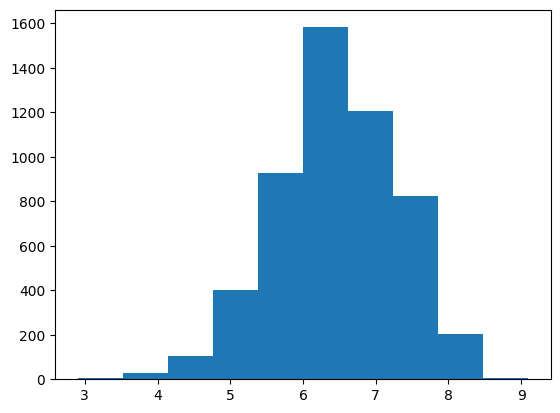

In [9]:
#Vemos grafica de barras paraobservar ladostribucion de los votos promedio
plt.hist(data_movies["vote_average"])
plt.show()

In [13]:
# Ahora sacaremos el numero de cuantas peliculas  por cada voto promedio y las mostraremos deformadescendiente
serie = data_movies.groupby(["vote_average"])["id"].count()
serie_ordenada =serie.sort_values(ascending=False)
serie_ordenada

vote_average
6.6    239
6.5    236
6.2    234
6.7    232
6.0    231
6.4    229
6.3    209
5.9    206
6.1    204
6.9    202
6.8    201
7.3    198
7.0    196
5.8    190
7.1    190
7.2    185
7.4    175
5.7    146
5.5    143
5.6    141
7.5    127
7.6    123
7.7    121
5.3    111
5.4    101
5.2     88
7.8     81
7.9     79
5.1     64
5.0     57
4.9     50
8.0     45
8.1     37
4.8     29
8.2     27
4.7     26
4.4     21
4.5     20
4.6     17
4.3     13
8.3     13
4.1     12
4.2      9
3.8      5
3.9      4
4.0      4
3.6      4
8.5      3
3.7      1
3.5      1
3.2      1
2.9      1
3.0      1
3.1      1
8.4      1
8.8      1
9.1      1
Name: id, dtype: int64

In [17]:
# Vemos que pelis han sido las que tienen mayor voto promedio
data_movies.groupby(["title"])["vote_average"].sum().sort_values(ascending=False)

title
Dilwale Dulhania Le Jayenge    9.1
Planet Earth                   8.8
Your Name.                     8.5
The Godfather                  8.5
The Shawshank Redemption       8.5
                              ... 
Jaws: The Revenge              3.5
Epic Movie                     3.2
Disaster Movie                 3.1
Battlefield Earth              3.0
Dragonball Evolution           2.9
Name: vote_average, Length: 5287, dtype: float64

In [53]:
# vemos cuabtas peliculas no tienen calificacion
data_movies[data_movies['vote_average'] == 0]

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,status,...,vote_average,vote_count,release_year,return,id_movies,name_company,id_company,Gender,id_gender,Countries


In [12]:
# Funcion que devuelve un data frame con el nombre de los valores unicos de la columna y el numero de veces que aparece en el DF
def dicc_dataframe(data,columna):
  dicc = {}
  for i in data:
    for j in i:
      if j in dicc:
        dicc[j] += 1
      else:
        dicc[j] = 1
  df_dicc = pd.DataFrame(list(dicc.items()), columns=[columna, 'Cantidad'])
  return df_dicc

In [16]:
df_countries = dicc_dataframe(data_movies['Countries'],'Countries')

In [44]:
# Crear una matriz de película-puntuaciones
pivot_ratings = data_movies.pivot_table(index='title', columns='id', values='vote_average', fill_value=0)

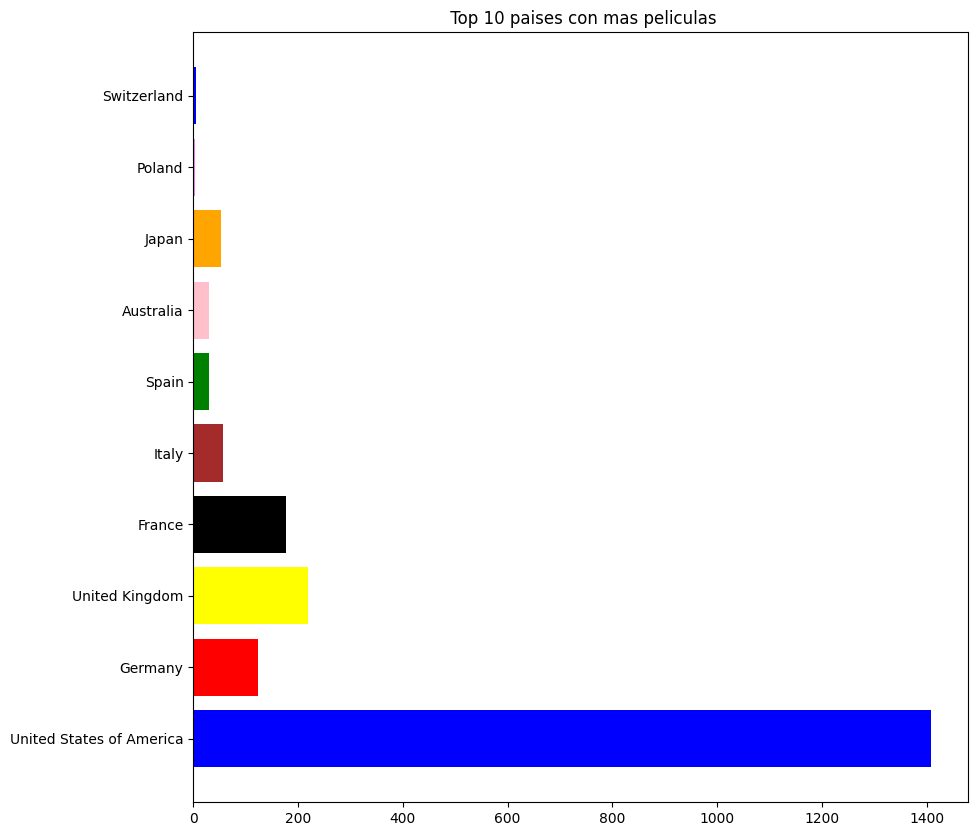

In [17]:
#Hacemos una grafica de barras para poder observar la distribucion de los paises con diferentes colores
plt.figure(figsize=(10,10))
plt.barh(y=df_countries['Countries'][:10], width=df_countries['Cantidad'][:10] ,color=["blue","red","yellow","black","brown","green","pink","orange","violet"])
plt.title(' Top 10 paises con mas peliculas')
plt.show()

In [19]:
df_generos = dicc_dataframe(data_movies['Gender'],'Genero')

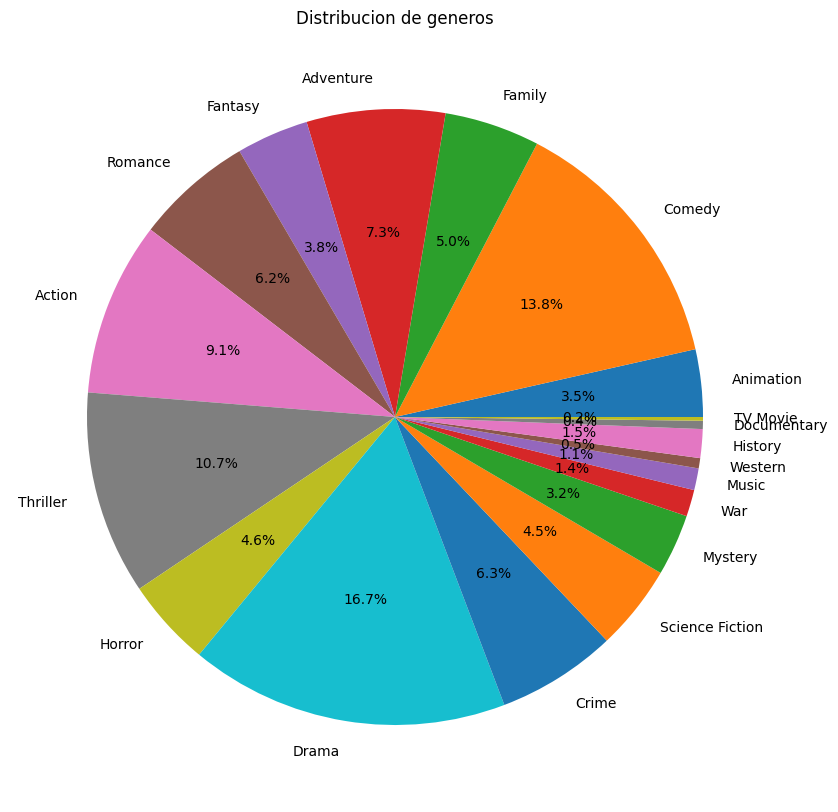

In [20]:
#Hacemos una grafica de pastel para poder observar ladistribucion de los generos
plt.figure(figsize=(10,10))
plt.pie(df_generos['Cantidad'], labels=df_generos['Genero'], autopct='%1.1f%%')
plt.title('Distribucion de generos')
plt.show()

In [21]:
df_company = dicc_dataframe(data_movies['name_company'],'name_company')

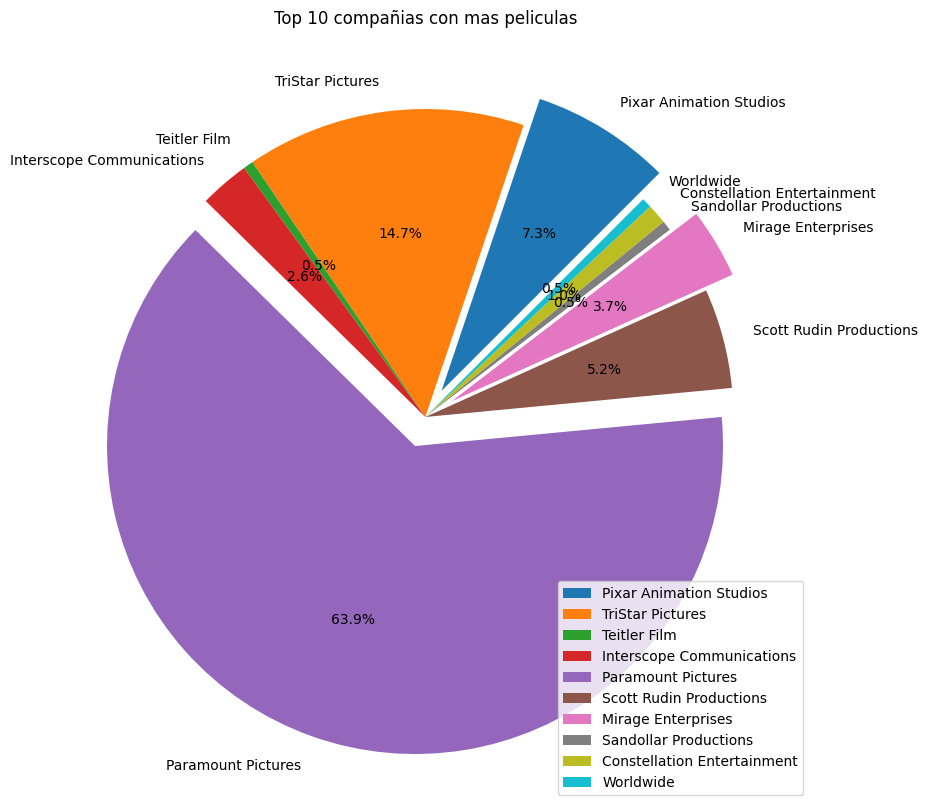

In [22]:
#Hacemos una grafica de pastel para poder observar la el top 10 de distribucion de las compañias
plt.figure(figsize=(10,10))
plt.pie(df_company['Cantidad'][:10], labels=df_company['name_company'][:10], autopct='%1.1f%%',startangle=45.,explode=(0.1,0,0,0,0.1,0,0.1,0,0,0))
plt.legend(loc='lower right')
plt.title('Top 10 compañias con mas peliculas')
plt.show()

In [23]:
# Funcion que nos devuleve un dataframe donde nos indica el retorno de la caracteriztica que recibe como parametro
def df_return(data,columna):
  dicc = {}
  for index,row in data.iterrows():
    for val in row[columna]:
      
        if val in dicc:
          dicc[val] += row['return']
        else:
          dicc[val] = row['return']
  df_dicc = pd.DataFrame(list(dicc.items()), columns=[columna, 'return'])
  return df_dicc

In [24]:
df_compania = df_return(data_movies,'name_company')

In [31]:
df_compania = df_compania.sort_values('return',ascending=False)[:10]

In [32]:
df_compania

,name_company,return
1481,Nu Image Films,8.500022e+06
1293,Millennium Films,8.500015e+06
1703,Grand Army Entertainment,8.500001e+06
1705,Leaves Productions,8.500000e+06
1374,Class 5 Films,8.500000e+06
1704,Langley Films,8.500000e+06
904,Studio Ghibli,1.018641e+06
100,Twentieth Century Fox Film Corporation,5.018908e+03
1321,Dune Entertainment,4.191329e+03
518,Donners' Company,4.175422e+03


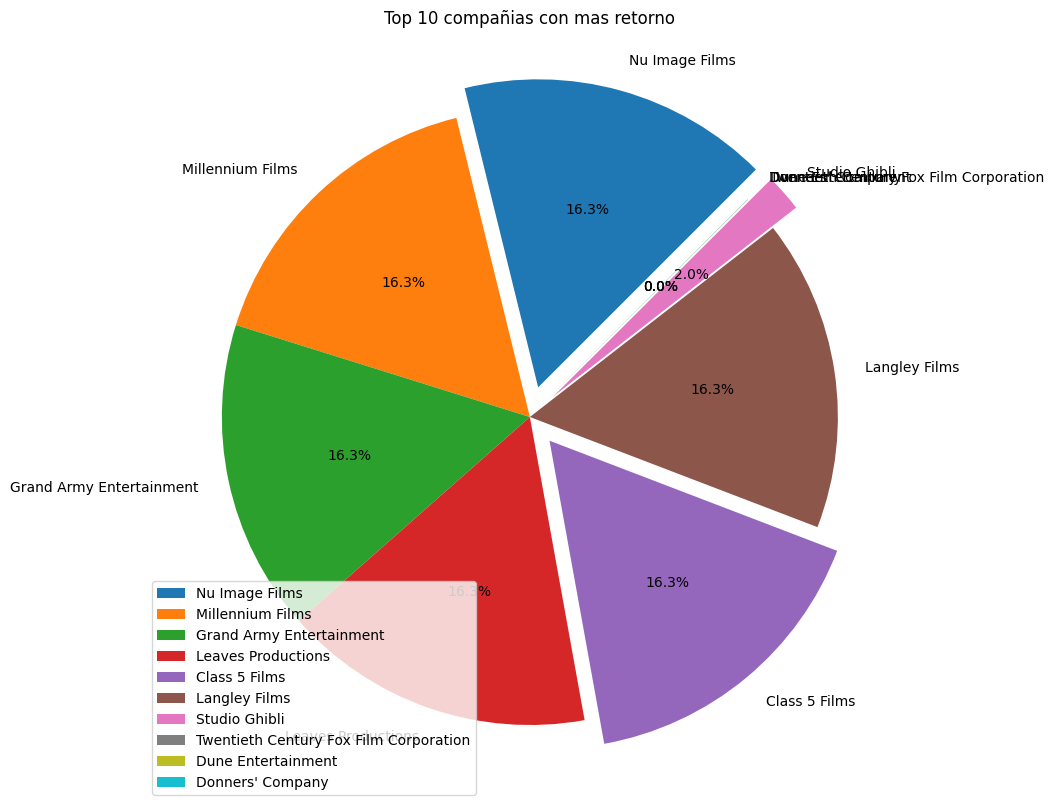

In [39]:
#Hacemos una grafica de pastel para poder observar la el top 10 de distribucion de retorno  las compañias
plt.figure(figsize=(10,10))
plt.pie(df_compania['return'][:10], labels=df_compania['name_company'][:10], autopct='%1.1f%%',startangle=45.,explode=(0.1,0,0,0,0.1,0,0.1,0,0,0))
plt.legend(loc='lower left')
plt.title('Top 10 compañias con mas retorno')
plt.show()

In [40]:
df_generos= df_return(data_movies,'Gender')

In [43]:
df_generos.sort_values('return',ascending=False)

,Gender,return
9,Drama,9.523731e+06
7,Thriller,8.507672e+06
1,Comedy,8.503995e+06
10,Crime,8.501519e+06
5,Romance,1.020311e+06
0,Animation,1.019870e+06
6,Action,7.368654e+03
3,Adventure,6.027627e+03
11,Science Fiction,5.983437e+03
2,Family,1.692596e+03


Text(0.5, 1.0, 'Top 10 generos con mayor retorno')

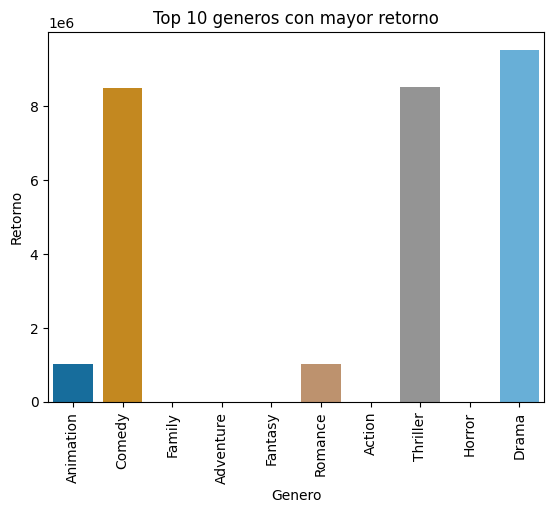

In [41]:
# graficad e barras donde se visualiza el top 10 de losgeneros con mayor retorno
ax = sns.barplot(x=df_generos['Gender'][:10], y=df_generos['return'][:10],palette="colorblind")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Genero')
plt.ylabel('Retorno')
plt.title('Top 10 generos con mayor retorno')

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### funcion de recomendacion

In [127]:

def recomendar_peliculas_por_puntuacion(titulo_pelicula):
    """Función para recomendar películas basadas en vectorizacion de las descripciones"""

    peliculas = data_movies['title'].tolist()

    if titulo_pelicula not in peliculas:
        return "Pelicula no encontrada"

   
     
    # Vectorizar las descripciones usando TF-IDF
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(data_movies['overview'])

    # Obtener el índice de la película dada
    idx = data_movies[data_movies['title'] == titulo_pelicula].index[0]


    # Calcular la similitud del coseno entre la película dada y todas las demás
    cosine_sim = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()

   # Ordenar las películas por la similitud en orden descendente
    sim_scores = list(enumerate(cosine_sim))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Seleccionar las más cercanas (excluyendo la propia película)
    sim_scores = sim_scores[1:5+1]
    
    # Obtener los índices de las películas recomendadas
    movie_indices = [i[0] for i in sim_scores]

    lista_pelis = data_movies['title'].iloc[movie_indices].tolist()

    return "Te recomendamos ver  las siguientes peliculas",lista_pelis


In [157]:
recomendar_peliculas_por_puntuacion('xXx')

('Te recomendamos ver  las siguientes peliculas',
 ['xXx: Return of Xander Cage',
  'Kingsman: The Secret Service',
  'Mission: Impossible - Rogue Nation',
  'Edge of Tomorrow',
  'Rambo: First Blood Part II'])

In [96]:
pelis_altas = data_movies[data_movies["vote_average"]>7]["title"].tolist()

In [97]:
pelis_altas

['Toy Story',
 'Heat',
 'Balto',
 'Casino',
 'Sense and Sensibility',
 'Leaving Las Vegas',
 'The City of Lost Children',
 'Twelve Monkeys',
 'Dead Man Walking',
 'Se7en',
 'The Usual Suspects',
 'The Postman',
 'La Haine',
 'The Bridges of Madison County',
 'Braveheart',
 'Taxi Driver',
 'Chungking Express',
 'The Basketball Diaries',
 'Apollo 13',
 'Belle de Jour',
 'Smoke',
 'The Umbrellas of Cherbourg',
 'Before Sunrise',
 'Clerks',
 'Dolores Claiborne',
 'Ed Wood',
 'Interview with the Vampire',
 'Star Wars',
 'A Little Princess',
 'Legends of the Fall',
 'Leon: The Professional',
 'Pulp Fiction',
 'Quiz Show',
 'Three Colors: Red',
 'Three Colors: Blue',
 'Three Colors: White',
 'The Shawshank Redemption',
 "What's Eating Gilbert Grape",
 'The Adventures of Priscilla, Queen of the Desert',
 'The Crow',
 'Forrest Gump',
 'The Lion King',
 'In the Mouth of Madness',
 'A Bronx Tale',
 "Carlito's Way",
 'Dazed and Confused',
 'The Fugitive',
 'The Hudsucker Proxy',
 'In the Name of t

In [99]:
pelis_bajas = data_movies[data_movies["vote_average"]<5]["title"].tolist()

In [100]:
pelis_bajas

['Bio-Dome',
 'Vampire in Brooklyn',
 'Showgirls',
 'Junior',
 'Street Fighter',
 'Highlander: The Final Dimension',
 'Coneheads',
 'The Next Karate Kid',
 'RoboCop 3',
 'Sliver',
 'Super Mario Bros.',
 'Hellraiser: Bloodline',
 'Barb Wire',
 'Spy Hard',
 'The Phantom',
 'Striptease',
 'The Island of Dr. Moreau',
 'Grease 2',
 'Jaws 3-D',
 'Jungle 2 Jungle',
 'Double Team',
 'Anaconda',
 'Speed 2: Cruise Control',
 'Batman & Robin',
 'Mortal Kombat: Annihilation',
 'Spice World',
 'Species II',
 'Plan 9 from Outer Space',
 'Friday the 13th Part VIII: Jason Takes Manhattan',
 'Poltergeist III',
 'Exorcist II: The Heretic',
 'Honey I Blew Up the Kid',
 'The Avengers',
 'Holy Man',
 'Police Academy 4: Citizens on Patrol',
 'Police Academy 5: Assignment Miami Beach',
 'Police Academy 6: City Under Siege',
 'Superman IV: The Quest for Peace',
 'Inspector Gadget',
 'Universal Soldier: The Return',
 'Stop! Or My Mom Will Shoot',
 'The Flintstones in Viva Rock Vegas',
 'Battlefield Earth',
 'N